# Setup

In [ ]:
# import numpy และ pandas เพื่อให้สามารถใช้งานข้อมูลแบบ array และ dataframe ได้
import numpy as np
import pandas as pd

# import os เพื่อให้สามารถใช้งานฟังก์ชันที่เกี่ยวกับระบบปฏิบัติการได้
import os

# import matplotlib.pyplot เพื่อให้สามารถทำการ visualize ข้อมูลได้
import matplotlib.pyplot as plt

# import tqdm.notebook เพื่อให้สามารถใช้งาน tqdm (library สำหรับการแสดง progress bar) ได้
from tqdm.notebook import tqdm

# import tensorflow เพื่อให้สามารถใช้งาน TensorFlow ได้
import tensorflow as tf

# import keras จาก tensorflow เพื่อให้สามารถใช้งาน high-level neural networks API (Keras) ได้
from tensorflow import keras

# import matplotlib.pyplot และ numpy อีกครั้งเพื่อให้สามารถทำการ visualize ข้อมูลและใช้งาน array ได้
import matplotlib.pyplot as plt
import numpy as np

# import os เพื่อให้สามารถใช้งานฟังก์ชันที่เกี่ยวกับระบบปฏิบัติการได้
import os


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader,random_split,TensorDataset
# from torchvision.utils import make_grid
# from torchvision.transforms import ToTensor
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# import torchvision.models as models

In [ ]:
from google.colab import drive
drive.mount('H')

Mounted at H


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

# Get data

In [ ]:
# กำหนดขนาดของรูปภาพ
image_size = 224

# กำหนดขนาดที่ต้องการให้รูปภาพเป็น (224, 224) pixels
target_size = (image_size, image_size)

# กำหนดรูปแบบของข้อมูลนำเข้า (input shape) ของโมเดล
input_shape = (image_size, image_size, 3)

# กำหนดขนาดของ batch และจำนวน epochs ในการฝึกโมเดล
batch_size = 32
epochs = 25

In [ ]:
# import ไลบรารีที่ใช้ในการจัดการรูปภาพ
import os
from keras.preprocessing.image import ImageDataGenerator

# กำหนดที่อยู่ของโฟลเดอร์ที่มีรูปภาพสำหรับการฝึกและทดสอบ
train_path = "/content/H/MyDrive/โปรเจค/train_ต้นไม้"
test_path = "/content/H/MyDrive/โปรเจค/test_ต้นไม้"


In [ ]:
# กำหนดพารามิเตอร์สำหรับ ImageDataGenerator สำหรับข้อมูลฝึก
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest"
)

# กำหนดพารามิเตอร์สำหรับ ImageDataGenerator สำหรับข้อมูลทดสอบ
test_datagen = ImageDataGenerator(rescale=1/255.0)

# Number of classes

In [ ]:
# สร้าง Iterator สำหรับข้อมูลฝึก
train_data = train_datagen.flow_from_directory(
    train_path,                 # ที่อยู่ของโฟลเดอร์ที่มีรูปภาพฝึก
    target_size=(image_size, image_size),  # ขนาดที่ต้องการให้รูปภาพ
    batch_size=batch_size,       # ขนาดของ batch
    class_mode="categorical"    # โหมดการจัดกลุ่มคลาส (ในที่นี้ใช้ "categorical" เนื่องจากมีหลายคลาส)
)

# สร้าง Iterator สำหรับข้อมูลทดสอบ
test_data = test_datagen.flow_from_directory(
    test_path,                  # ที่อยู่ของโฟลเดอร์ที่มีรูปภาพทดสอบ
    target_size=(image_size, image_size),  # ขนาดที่ต้องการให้รูปภาพ
    batch_size=batch_size,       # ขนาดของ batch
    class_mode="categorical"    # โหมดการจัดกลุ่มคลาส (ในที่นี้ใช้ "categorical" เนื่องจากมีหลายคลาส)
)


Found 7316 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.


# Visualising a single image

In [ ]:
# ดึง batch ข้อมูลตัวอย่างแรกจาก Iterator
image, label = next(iter(train_data))

# แสดงผลขนาดของรูปภาพ
print("Image shape:", image.shape)

# แสดงผลลัพธ์ของ Label (Index)
print("Image Label (Index):", label)

# แสดงผลลัพธ์ของ Label (Class) โดยใช้ค่าที่ Mapping จาก train_data.class_indices
print("Image Label (Class):", train_data.class_indices)

# แสดงค่า pixel ของรูปภาพ
print(image)


Image shape: (32, 224, 224, 3)
Image Label (Index): [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
Image Label (Class): {'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0, 'Corn_(maize)___Common_rust_': 1, 'Corn_(maize)___Northern_Leaf_Blight': 2, 'Corn_(maize)___healthy': 3}
[[[[0.         0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.00392157 0.        ]
   ...
   [0.54863024 0.6325847  0.48124504]
   [0.54863024 0.6325847  0.48124504]
   [0.54863024 0.6325847  0.48124504]]

  [[0.         0.00392157 0.        ]
   [0.  

# ใช้ Matplotlib เพื่อแสดงภาพต้นฉบับและภาพที่ถูกกลับสี (inverted image) ของ batch ข้อมูลตัวอย่างแรกที่ได้จาก Iterator (train_data) ที่มีการใช้ ImageDataGenerator:

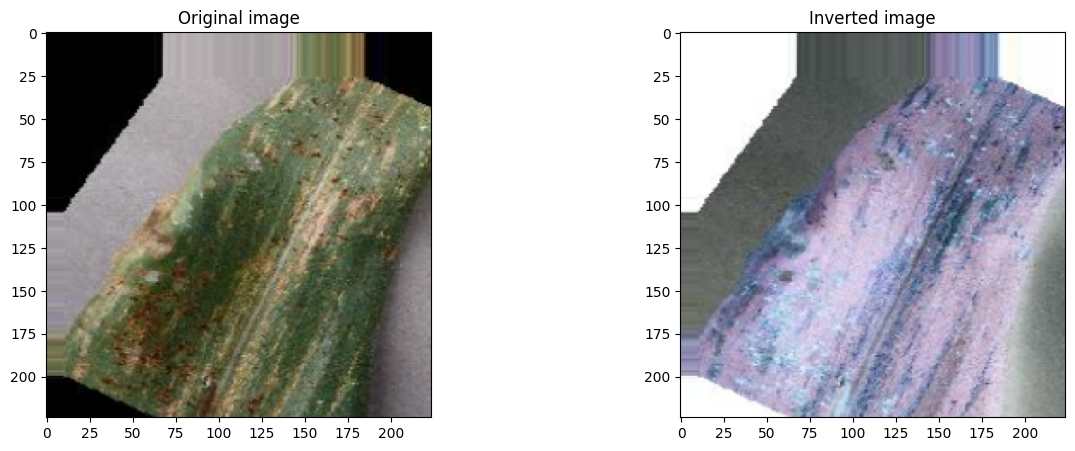

In [ ]:
import matplotlib.pyplot as plt

# Assuming `train_data` is your ImageDataGenerator for training data
image, label = next(iter(train_data))

# สร้าง figure ที่มี 2 subplot
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

# แสดงภาพต้นฉบับ
ax1.imshow(image[0])
ax1.set_title("Original image")

# สร้างภาพที่ถูกกลับสี (Inverted image)
inverted_image = 1 - image[0]
ax2.imshow(inverted_image)
ax2.set_title("Inverted image")

# แสดงภาพ
plt.show()


# Visualising a Batch of images

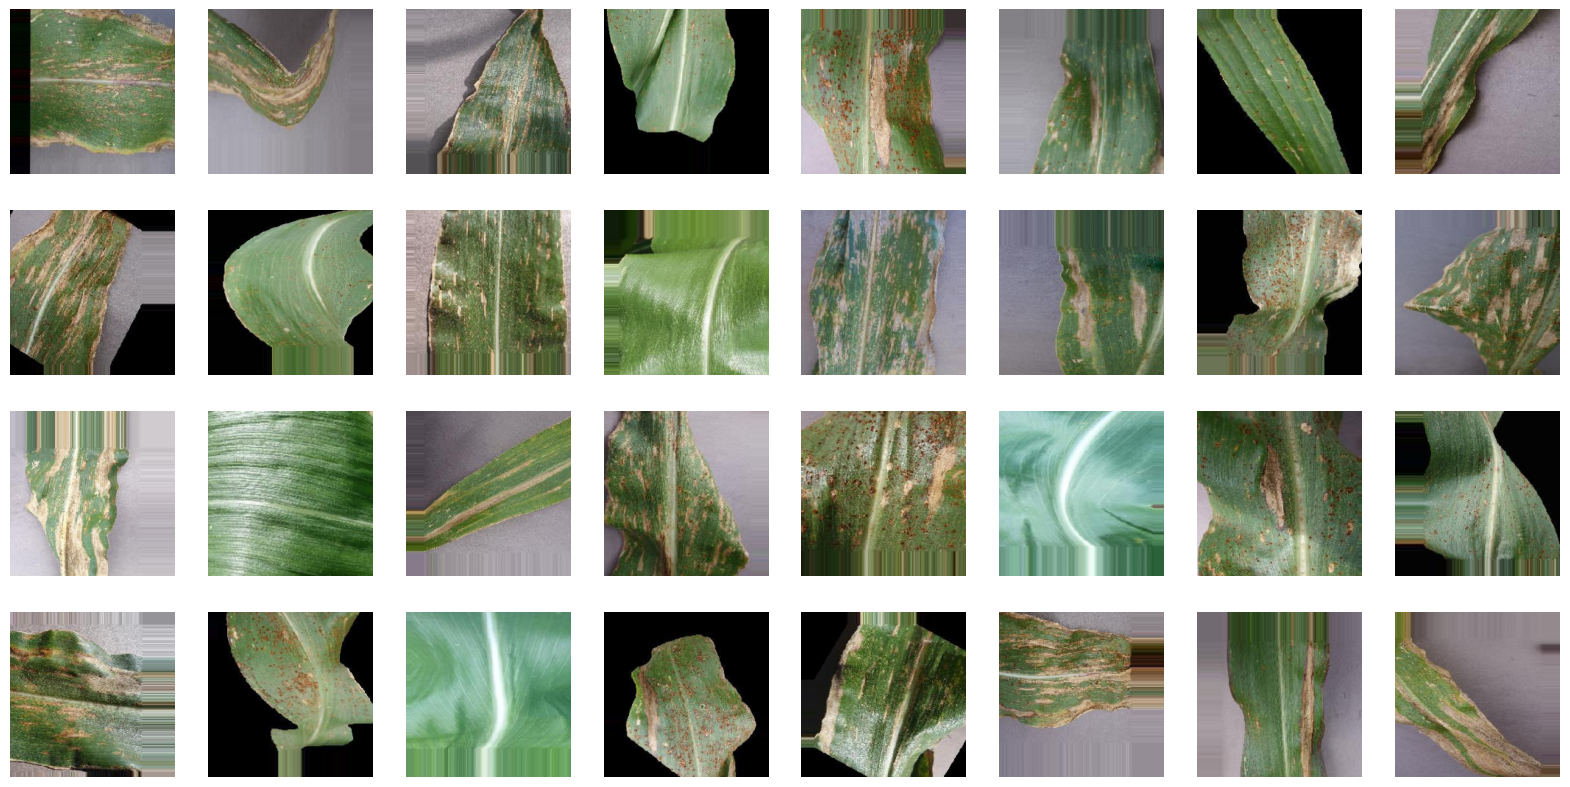

In [ ]:
import matplotlib.pyplot as plt

# Assuming `train_data` is your ImageDataGenerator for training data
for images, labels in train_data:
    # สร้าง subplot 4x8
    fig, axes = plt.subplots(4, 8, figsize=(20, 10))
    axes = axes.flatten()

    # แสดงทั้งหมด 32 รูปภาพในแต่ละรอบ
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')

    # แสดงภาพ
    plt.show()
    break  # ในที่นี้ใช้ break เพื่อให้แสดงเพียง batch แรกเท่านั้น


# Create a classes index file

ดึงชื่อของหมวดหมู่ (categories) ที่ได้จากการ mapping ของ train_data.class_indices ซึ่งเป็น dictionary ที่เก็บคู่ key-value ระหว่างชื่อของหมวดหมู่และค่า index ของหมวดหมู่นั้น ๆ

In [ ]:
# ดึงชื่อของหมวดหมู่ (categories) จาก train_data.class_indices
categories = list(train_data.class_indices.keys())

# แสดงผล dictionary ที่มี key เป็นชื่อหมวดหมู่ และ value เป็น index ของหมวดหมู่
print(train_data.class_indices)

# แสดงผลลัพธ์ที่ได้จากการดึงชื่อของหมวดหมู่
print("Categories:", categories)


{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0, 'Corn_(maize)___Common_rust_': 1, 'Corn_(maize)___Northern_Leaf_Blight': 2, 'Corn_(maize)___healthy': 3}
Categories: ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']


โค้ดนี้ใช้เพื่อบันทึกข้อมูลที่ได้จาก train_data.class_indices (dictionary ที่มีการ mapping ระหว่างชื่อหมวดหมู่และ index) เป็นไฟล์ JSON ที่ชื่อ "class_indices.json" และแสดงลิงก์เพื่อดาวน์โหลดไฟล์ JSON นั้นได้

In [ ]:
import json

# บันทึกข้อมูล class_indices เป็นไฟล์ JSON
with open('class_indices.json', 'w') as f:
    json.dump(train_data.class_indices, f)

# แสดงลิงก์สำหรับดาวน์โหลดไฟล์ JSON
from IPython.display import FileLink
FileLink(r'class_indices.json')


/content/class_indices.json

# Training

In [ ]:
# โหลดโมเดล MobileNet
base_model = tf.keras.applications.MobileNet(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape
)

# ตั้งค่าโมเดลไม่สามารถถูกฝึกเทรนได้
base_model.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# สร้าง input layer
inputs = keras.Input(shape=input_shape)

# นำ MobileNet มาใส่ในโมเดลใหม่
x = base_model(inputs, training=False)

# เพิ่มชั้น Global Average Pooling 2D เพื่อลดขนาดของข้อมูล
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# เพิ่มชั้น Dropout เพื่อลดการ overfitting
x = tf.keras.layers.Dropout(0.2)(x)

# เพิ่มชั้น Dense ที่เป็น output layer ด้วย activation function softmax
x = tf.keras.layers.Dense(len(categories), activation="softmax")(x)

# สร้างโมเดล
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [ ]:
# กำหนด optimizer เป็น Adam
optimizer = tf.keras.optimizers.Adam()

# คอมไพล์โมเดลโดยระบุ optimizer, loss function, และ metrics ที่ใช้ตรวจสอบประสิทธิภาพของโมเดล
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.CategoricalAccuracy(),
        'accuracy'
    ]
)

In [ ]:
# ฝึกเทรนโมเดลโดยใช้ข้อมูลจาก train_data และ test_data
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
    steps_per_epoch=25,       # จำนวนขั้นตอนที่ใช้ในการฝึกเทรนต่อ 1 epoch
    validation_steps=100      # จำนวนขั้นตอนที่ใช้ในการทดสอบ validation data ต่อ 1 epoch
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - ETA: 0s - loss: 1.1975 - categorical_accuracy: 0.5013 - accuracy: 0.5013

25/25 [==============================] - 587s 24s/step - loss: 1.1975 - categorical_accuracy: 0.5013 - accuracy: 0.5013 - val_loss: 0.4752 - val_categorical_accuracy: 0.8491 - val_accuracy: 0.8491
Epoch 2/25
25/25 [==============================] - 141s 6s/step - loss: 0.4602 - categorical_accuracy: 0.8450 - accuracy: 0.8450
Epoch 3/25
25/25 [==============================] - 129s 5s/step - loss: 0.3388 - categorical_accuracy: 0.8813 - accuracy: 0.8813
Epoch 4/25
25/25 [==============================] - 125s 5s/step - loss: 0.2956 - categorical_accuracy: 0.8988 - accuracy: 0.8988
Epoch 5/25
25/25 [==============================] - 97s 4s/step - loss: 0.2398 - categorical_accuracy: 0.9087 - accuracy: 0.9087
Epoch 6/25
25/25 [==============================] - 96s 4s/step - loss: 0.2461 - categorical_accuracy: 0.9137 - accuracy: 0.9137
Epoch 7/25
25/25 [==============================] - 85s 3s/step - loss: 0.2062 - categorical_accuracy: 0.9237 - accuracy: 0.9237
Epoch 8/25
25/25 [========

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'accuracy', 'val_loss', 'val_categorical_accuracy', 'val_accuracy'])


# Review the training process

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

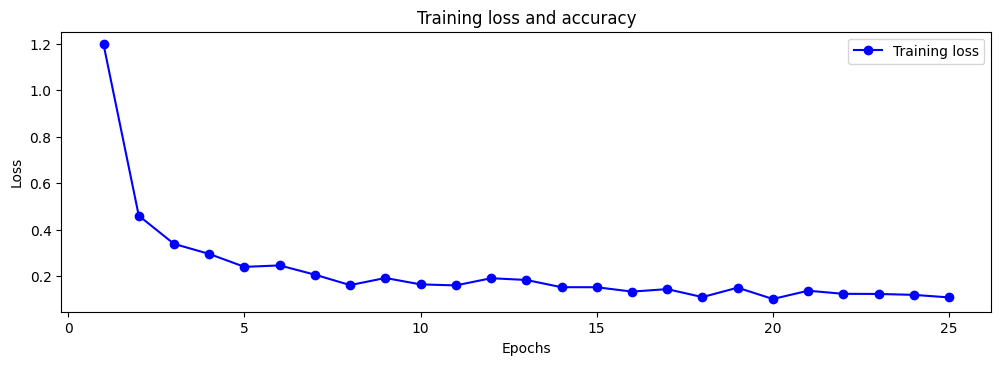

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟ loss และ accuracy
loss = history.history['loss']
acc = history.history['categorical_accuracy']
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_categorical_accuracy')

epochs = range(1, len(loss) + 1)

# พล็อตกราฟ loss และ accuracy
plt.figure(figsize=(12, 8))

# Training Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation Loss
if val_loss is not None:
    plt.plot(epochs, val_loss, 'b-', label='Validation loss')
    plt.title('Training loss and accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Training Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation Accuracy
if val_acc is not None:
    plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


# แสดงค่า loss และ accuracy ที่ได้ใน epoch ล่าสุดของกระบวนการฝึกเทรน.

In [ ]:
# Your existing code
loss = history.history['loss'][-1]  # ค่า loss ของข้อมูลฝึกใน epoch ล่าสุด
acc = history.history['categorical_accuracy'][-1]  # ความแม่นยำของข้อมูลฝึกใน epoch ล่าสุด

# ดึงค่า validation loss และ validation accuracy หากมีข้อมูลทดสอบ
val_loss = history.history.get('val_loss')[-1] if val_loss else None
val_acc = history.history.get('val_categorical_accuracy')[-1] if val_acc else None

# แสดงผลค่า loss และ accuracy ใน epoch ล่าสุด
print("Training Loss:", loss)
print("Training Accuracy:", acc)

# แสดงผลค่า validation loss และ validation accuracy หากมีข้อมูลทดสอบ
if val_loss is not None:
    print("\nLast Epoch Validation Loss:", val_loss)

if val_acc is not None:
    print("\nLast Epoch Validation Accuracy:", val_acc)


Training Loss: 0.10839391499757767
Training Accuracy: 0.9649999737739563

Last Epoch Validation Loss: 0.4751758873462677

Last Epoch Validation Accuracy: 0.8490978479385376


# Save the model

บันทึก (save) โมเดลที่ถูกฝึกเทรนไว้ลงในไฟล์หรือโฟลเดอร์ที่ระบุ. ในที่นี้คือการบันทึกโมเดลลงในโฟลเดอร์ที่ชื่อ "plant_disease".

In [ ]:
model.save('plant_disease')

# Converting to tflite Model

ใช้ TensorFlow Lite Converter เพื่อแปลง (convert) โมเดลที่ถูกฝึกเทรนเป็นรูปแบบ TensorFlow Lite (.tflite) เพื่อให้สามารถใช้งานบนอุปกรณ์ที่มีข้อจำกัดทางความสามารถ เช่น อุปกรณ์มือถือหรืออุปกรณ์ IoT.

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Prediction on some single image of test data

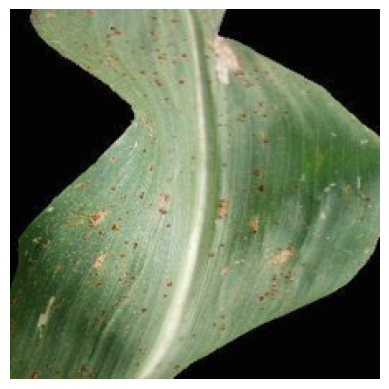

Predicted class: Corn_(maize)___Common_rust_


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and preprocess the image
image_path = "/content/H/MyDrive/โปรเจค/test_ต้นไม้/Corn_(maize)___Common_rust_/RS_Rust 1598_flipLR.JPG"
input_image = Image.open(image_path).resize((224, 224))
input_array = np.expand_dims(np.array(input_image) / 255.0, axis=0).astype(np.float32)

# Set the input tensor to the loaded image
interpreter.set_tensor(input_details[0]['index'], input_array)

# Run inference
interpreter.invoke()

# Get the output tensor
output_tensor = interpreter.get_tensor(output_details[0]['index'])

# Extract the predicted class index
predicted_class = np.argmax(output_tensor)

class_names = [
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy"
]

# Map the predicted class index to the class name
predicted_class_name = class_names[predicted_class]

# Display the image
plt.imshow(input_image)
plt.axis('off')  # Hide axes
plt.show()

# Print the predicted class name
print(f"Predicted class: {predicted_class_name}")


ใช้ TensorFlow Lite Interpreter เพื่อทำนายภาพที่ให้เข้ามาโดยใช้โมเดล TensorFlow Lite (.tflite) ที่ถูกฝึกเทรนไว้.

# สรุปครั้งที่5ครบ

โปรเจคนี้เกี่ยวกับการใช้เทคโนโลยีการเรียนรู้ของเครื่อง (Machine Learning) และ Deep Learning ในการสร้างและใช้โมเดลการทำนายภาพเพื่อตรวจสอบโรคในต้นไม้ โดยมีขั้นตอนการทำงานที่สำคัญต่อไปนี้:

*   การเตรียมข้อมูล:

ใช้ TensorFlow และ PyTorch ในการเตรียมข้อมูลสำหรับการฝึกเทรนและทดสอบโมเดล.
ใช้ไลบรารี ImageDataGenerator ของ Keras ในการสร้างข้อมูลฝึกเทรนโดยทำการ augmentation ข้อมูล.


*   การสร้างและฝึกเทรนโมเดล:

ใช้โมเดล MobileNet ที่ถูกฝึกเทรนล่วงหน้า (pre-trained) ด้วยข้อมูล ImageNet.
ทำการ Fine-tuning โมเดลนี้ด้วยข้อมูลภาพของต้นไม้ที่เป็นโรค.
บันทึกโมเดลที่ถูกฝึกเทรนเป็นไฟล์ TensorFlow Lite (.tflite) เพื่อให้สามารถนำไปใช้งานในแอปพลิเคชันหรืออุปกรณ์ที่มีทรัพยากรจำกัด.


*   การทำนายภาพ:


ใช้ TensorFlow Lite Interpreter เพื่อทำนายภาพจากโมเดลที่ถูกบันทึก.
แสดงภาพที่ถูกทำนายและผลลัพธ์ที่ได้.

*   การวิเคราะห์ผลลัพธ์:


แสดงค่าความน่าจะเป็น (probability) และชื่อของคลาสที่ทำนายได้.
แสดงกราฟ Loss และ Accuracy ของโมเดลขณะฝึกเทรน.


*   การใช้ PyTorch:


ใช้ PyTorch ในการเตรียมข้อมูลและการฝึกเทรนโมเดล.
ใช้ DataLoader, ImageFolder, และ TensorDataset ในการจัดการข้อมูล.


การบันทึก Class Indices:

*   การบันทึก Class Indices:


สร้างและบันทึกไฟล์ JSON ที่เก็บข้อมูลของ Class Indices ที่ใช้ในการฝึกเทรน.
โปรเจคนี้ทำให้ได้ทดลองการใช้ TensorFlow และ PyTorch ในการสร้างและใช้โมเดลการทำนายภาพ และได้ฝึกเทรนโมเดลด้วยข้อมูลที่เกี่ยวข้องกับการตรวจสอบโรคในต้นไม้และการนำไปใช้งาน